<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-12/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def cascade(image, cascade):

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original')

    # Detect faces
    roi_faces = cascade.detectMultiScale(image)

    # Draw rectangles around the faces on the left
    for (x, y, w, h) in roi_faces:
        cv.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 3)

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('With Rectangles')

    # Show the plots
    plt.show()


## Tugas Praktikum

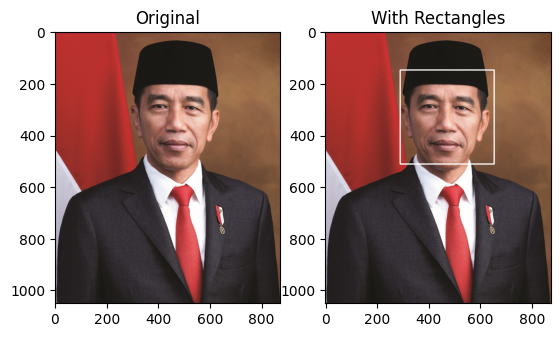

In [4]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/jokowi.jpg')

cascade(jokowi, cascade_wajah)

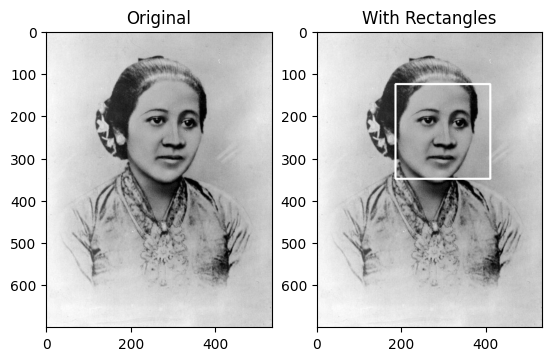

In [5]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_frontalface_alt.xml')
kartini = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/kartini.jpg')

cascade(kartini, cascade_wajah)


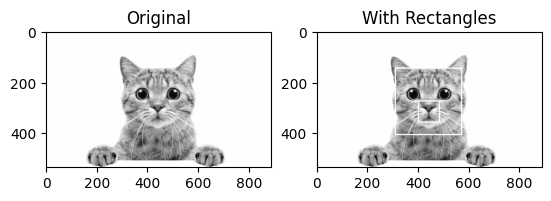

In [6]:
cascade_cat = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_frontalcatface.xml')
kucing = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/kucing.jpg',0)

cascade(kucing, cascade_cat)

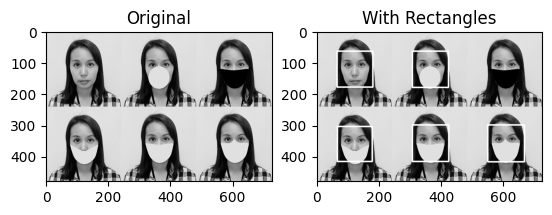

In [7]:

mask = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/mask.png',0)

cascade(mask, cascade_wajah)


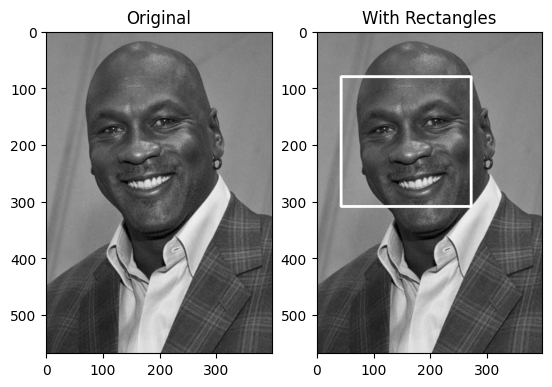

In [8]:
mjordan = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/mjordan.jpg',0)

cascade(mjordan, cascade_wajah)

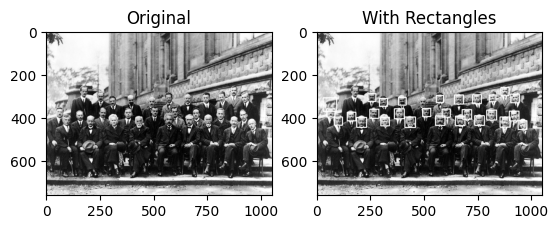

In [9]:
solvayconf = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/solvayconf.jpg')

cascade(solvayconf, cascade_wajah)

## Nomor 3

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

## Nomor 4

Cobakan juga untuk eyes detection.

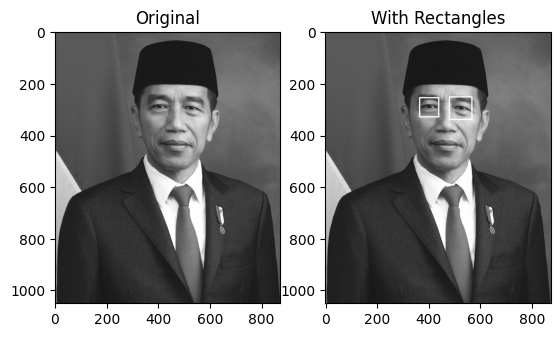

In [10]:
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_eye.xml')
jokowi = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/jokowi.jpg',0)
cascade(jokowi, cascade_mata)

## Nomor 5

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [11]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

In [12]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [14]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

In [15]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


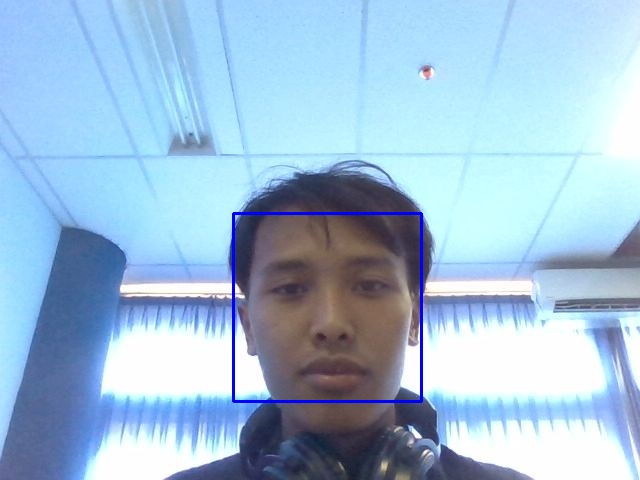

In [16]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Nomor 6

Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

In [24]:
import copy

In [37]:
def cascade_blur(image, cascade):
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original')
    ori_img = copy.deepcopy(image)

    # Detect faces
    roi_faces = cascade.detectMultiScale(image)

    # Draw rectangles around the faces on the left
    for (x, y, w, h) in roi_faces:
        cv.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 3)

    plt.subplot(1, 3, 2)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('With Rectangles')

    # Apply blur to the detected faces
    for (x, y, w, h) in roi_faces:
        roi = ori_img[y:y+h, x:x+w]
        roi = cv.GaussianBlur(roi, (25, 25), 0)
        ori_img[y:y+h, x:x+w] = roi

    plt.subplot(1, 3, 3)
    plt.imshow(cv.cvtColor(ori_img, cv.COLOR_BGR2RGB))
    plt.title('With Blur')

    # Show the plots
    plt.show()

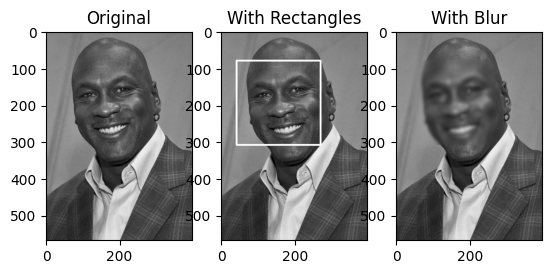

In [38]:
mjordan = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/mjordan.jpg',0)

cascade_blur(mjordan, cascade_wajah)

## Nomor 7

Lakukan segmentasi karakter pada KTP seperti gambar berikut

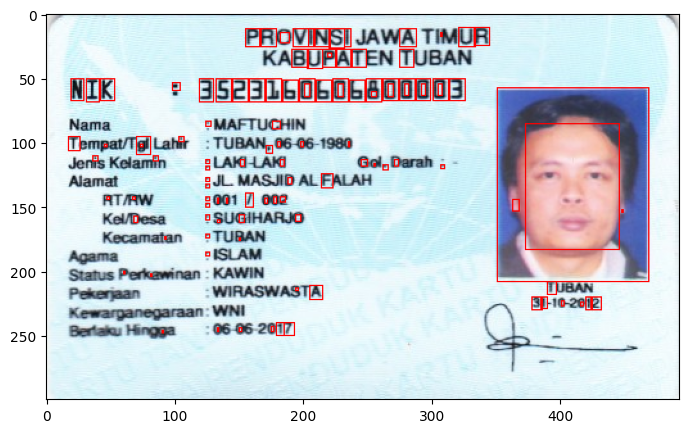

In [39]:
ktp = cv.imread('/content/drive/MyDrive/pcvk-resources/KTP_More/ktp4.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

## Nomor 8


Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

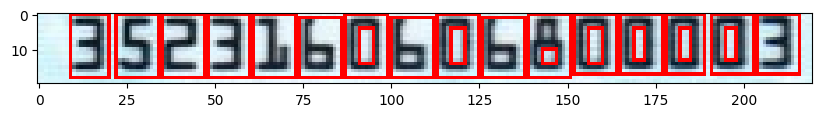

In [40]:

# Load the input image
ktp = cv.imread('/content/drive/MyDrive/pcvk-resources/KTP_More/ktp4.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[50:70, 110:330]

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

## Nomor 9

Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [43]:
!pip install tensorflow tqdm

In [45]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load MNIST dataset
(X_mnist, y_mnist), (_, _) = tf.keras.datasets.mnist.load_data()

# Number of samples per class
num_samples_per_class = 100

# Digits to extract (0 to 9)
digits_to_extract = list(range(10))

# Function to extract samples from each category
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Extract samples from each category
training_data = extract_samples(X_mnist, y_mnist, digits_to_extract, num_samples_per_class)

# Shuffle the data
np.random.shuffle(training_data)

# Separate features and labels
X_samples, Y_samples = zip(*training_data)

# Convert to numpy array
X_samples = np.array(X_samples).reshape(-1, 28, 28, 1)

# Write to pickle files
pickle_out = open("X_samples.pickle", "wb")
pickle.dump(X_samples, pickle_out)
pickle_out.close()

pickle_out = open("Y_samples.pickle", "wb")
pickle.dump(to_categorical(Y_samples, num_classes=10), pickle_out)
pickle_out.close()


## Train Data

In [49]:

# Load file pickle
pickle_in = open("X_samples.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_samples.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 4s 29ms/step - loss: 8.2806 - accuracy: 0.2060
Epoch 2/20
32/32 [==============================] - 1s 29ms/step - loss: 1.7499 - accuracy: 0.5420
Epoch 3/20
32/32 [==============================] - 1s 28ms/step - loss: 0.9848 - accuracy: 0.7080
Epoch 4/20
32/32 [==============================] - 1s 29ms/step - loss: 0.7087 - accuracy: 0.7770
Epoch 5/20
32/32 [==============================] - 1s 29ms/step - loss: 0.5252 - accuracy: 0.8390
Epoch 6/20
32/32 [==============================] - 1s 29ms/step - loss: 0.3743 - accuracy: 0.8830
Epoch 7/20
32/32 [==============================] - 1s 29ms/step - loss: 0.3034 - accuracy: 0.9130
Epoch 8/20
32/32 [==============================] - 1s 29ms/step - loss: 0.2344 - accuracy: 0.9390
Epoch 9/20
32/32 [==============================] - 1s 29ms/step - loss: 0.1761 - accuracy: 0.9620
Epoch 10/20
32/32 [==============================] - 1s 34ms/step - loss: 0.1408 - accuracy: 0.9680
Epoch 11/

## Test Data

32/32 [==============================] - 1s 9ms/step - loss: 2.2563 - accuracy: 0.9790
Accuracy on the test set: 97.90%


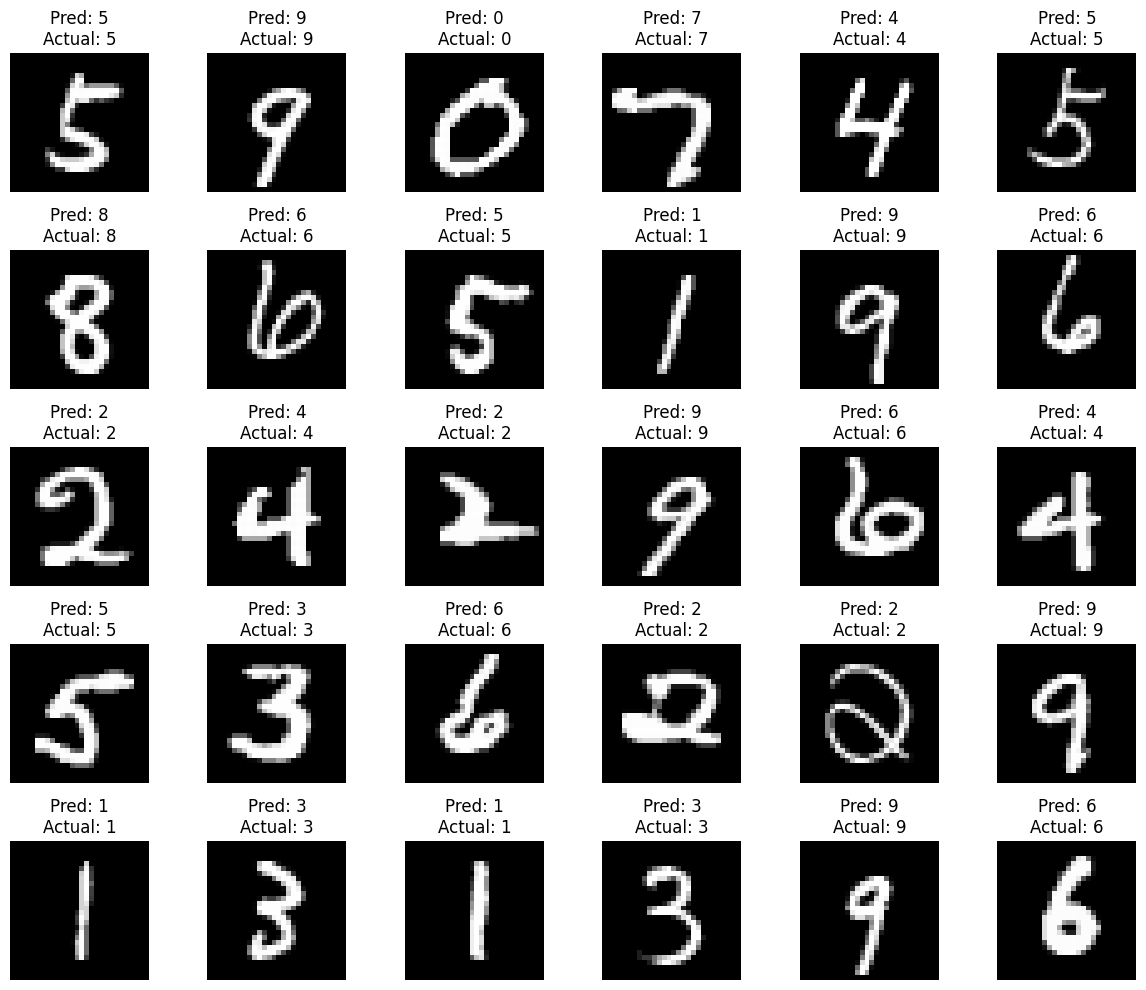

In [51]:

import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_samples.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_samples.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

import matplotlib.pyplot as plt

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Assuming the images are 100x100 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()